In [1]:
import numpy as np
import pylab as pl
from skfdiff import Model, Simulation

Zarr module not found, ZarrContainer not available.


/Users/Louis/.pyenv/versions/3.9.18/envs/neural_ednn_3.9.18/lib/python3.9/site-packages/skfdiff/core/backends/__init__.py:10: UserWarning: Numba cannot be imported: numba backend will not be available.
  warnings.warn("Numba cannot be imported: numba backend will not be available.")
fatal: bad revision 'HEAD'


In [2]:
Nx = 1000

x1 = -20.0
x2 = 20

U_i = 2.0
cu = 0.2
cd = -1.0
mu0 = 0.38
mu2 = -0.01

In [11]:
model = Model(["(-U_i * dxU + dxxU) + (2*cu * dxV - cd * dxxV) + (mu-cu*cu+mue*x)*U",
               "(-U_i * dxV + dxxV) + (-2*cu * dxU + cd * dxxU) + (mu-cu*cu+mue*x)*V"],
              ["U(x)", "V(x)"],
              parameters=["U_i", "cu", "cd", "mu","mue"])

In [12]:
x = np.linspace(x1,x2,num=Nx, dtype=np.float32)

In [13]:
n = 20
U = np.exp(-x**2)
V = np.exp(-x**2)

In [14]:
initial_fields = model.fields_template(x=x, U=U, V=V,U_i=U_i, cu=cu,cd=cd,mu=mu0,mue=mu2)

In [15]:
simulation = Simulation(model, initial_fields, dt=0.01, tmax=30)

In [16]:
container = simulation.attach_container()

In [17]:
simulation.run()


46e60d running: t: 30: : 3000it [05:47,  8.63it/s]                              


(30.0,
 <xarray.Dataset>
 Dimensions:  (x: 1000)
 Coordinates:
   * x        (x) float32 -20.0 -19.96 -19.92 -19.88 ... 19.88 19.92 19.96 20.0
 Data variables:
     U        (x) float64 -1.076 -1.076 -1.076 -1.076 ... -15.5 -15.49 -15.49
     V        (x) float64 -0.7436 -0.7436 -0.7436 ... -1.101 -1.114 -1.119
     U_i      float64 2.0
     cu       float64 0.2
     cd       float64 -1.0
     mu       float64 0.38
     mue      float64 -0.01)

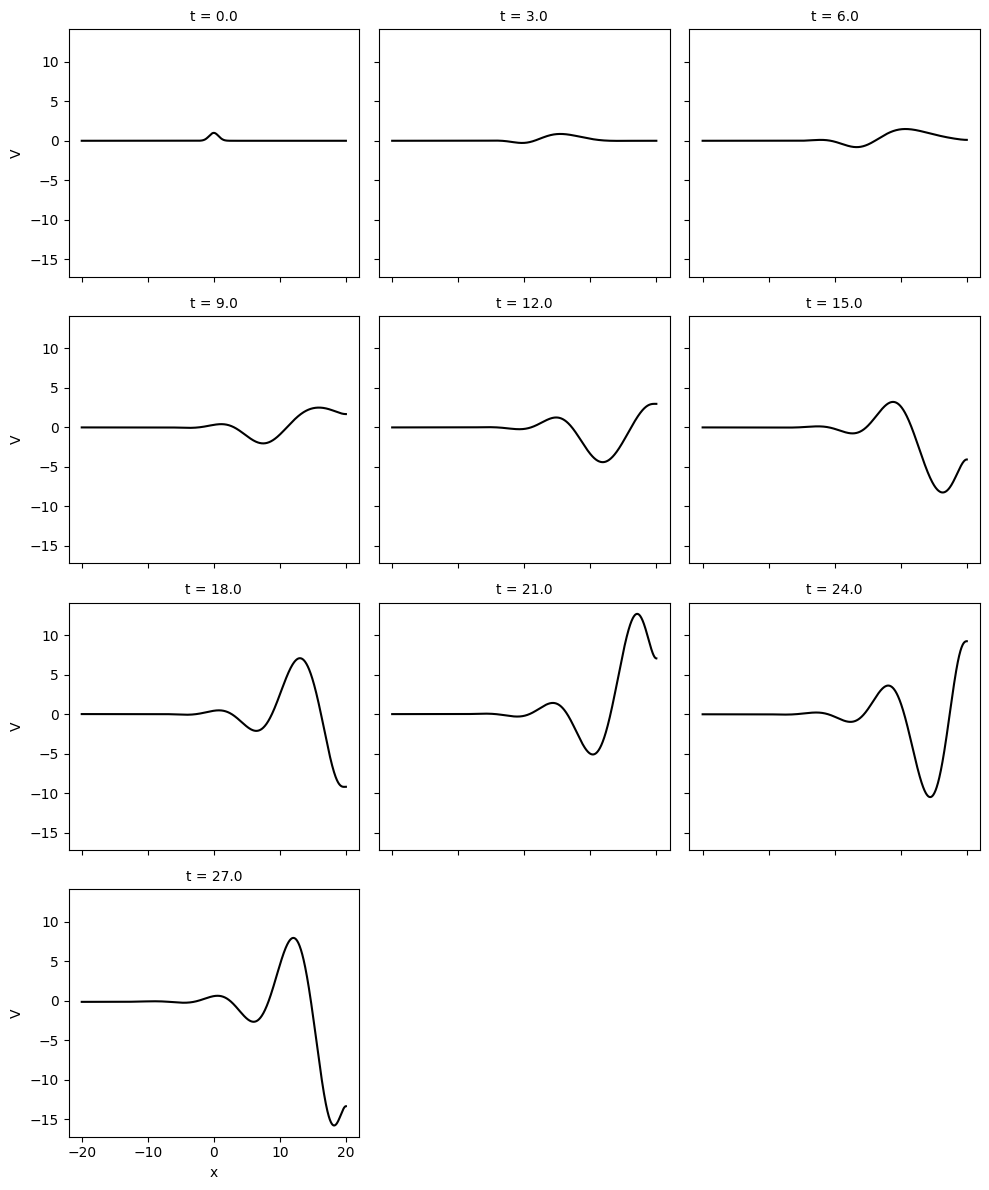

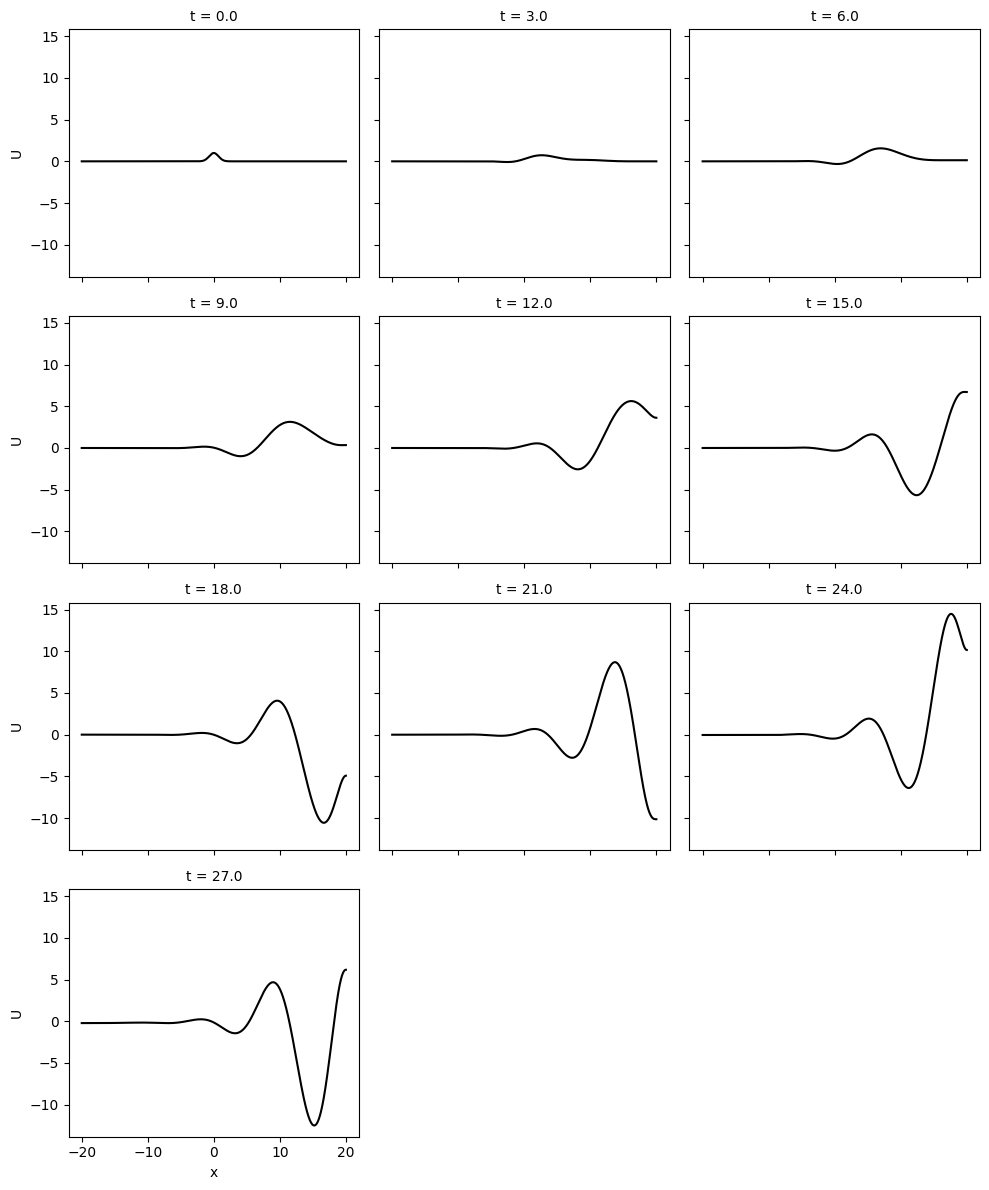

In [21]:
(
    container.data.V[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    ),
    container.data.U[: -2 : container.data.t.size // 10].plot(
        col="t", col_wrap=3, color="black"
    )
)
pl.show()

In [13]:
data = container.data.copy()

In [14]:
data['V']

<xarray.DataArray 'V' (t: 1001, x: 1000)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.34884082e-05, -1.34911233e-05, -1.34994320e-05, ...,
         2.45574089e+00,  2.45450974e+00,  2.45408686e+00],
       [-1.35973999e-05, -1.36001275e-05, -1.36084750e-05, ...,
         2.46317920e+00,  2.46194614e+00,  2.46152253e+00],
       [-1.37070779e-05, -1.37098180e-05, -1.37182043e-05, ...,
         2.47059919e+00,  2.46936418e+00,  2.46893985e+00]])
Coordinates:
  * x        (x) float32 -20.0 -19.96 -19.92 -19.88 ... 19.88 19.92 19.96 20.0
  * t        (t) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99 10.0